In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = 'RM Cost Details.csv'  # Ensure this path is correct
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Material', 'Type', 'Temp', 'Spec'], drop_first=True)



   Sl. # Material   Type Alloy   Temp       Spec  Thick/Dia  Width  Length  \
0      1      Alu  Plate  7075  T7351  QQA250/12       1.75   4.00     9.0   
1      2      Alu  Plate  7050  T7451    AMS4050       3.00   8.10    15.0   
2      3      Alu  Plate  7050  T7451    AMS4050       2.00   6.50    15.3   
3      4      Alu  Plate  7075  T7351  QQA250/12       1.75   2.25     7.0   
4      5      Alu  Plate  7050  T7451    AMS4050       3.00   7.10    12.6   

   Weight in Kgs   RM Price Price/Kilo  
0           3.03    $16.95      $5.60   
1          17.15   $116.45      $6.79   
2           9.39    $87.40      $9.31   
3           1.36     $9.32      $6.85   
4          12.67   $117.40      $9.26   


In [ ]:
df.isnull().sum()

Sl. #            0
Material         0
Type             0
Alloy            0
Temp             3
Spec             0
Thick/Dia        0
Width            0
Length           0
Weight in Kgs    7
RM Price         0
Price/Kilo       0
dtype: int64

In [ ]:
df.shape

(741, 12)

In [ ]:

pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 5.1 MB/s eta 0:00:00


DECISION TREE IMPLEMENTATION

Mean Squared Error: 481.78171224489796
R^2 Score: 0.9969854167229522
Intercept 2488.6853259269865
Prediction_local [282.85329096]
Right: 3.49
LIME Explanation for Decision Tree Model - Instance 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


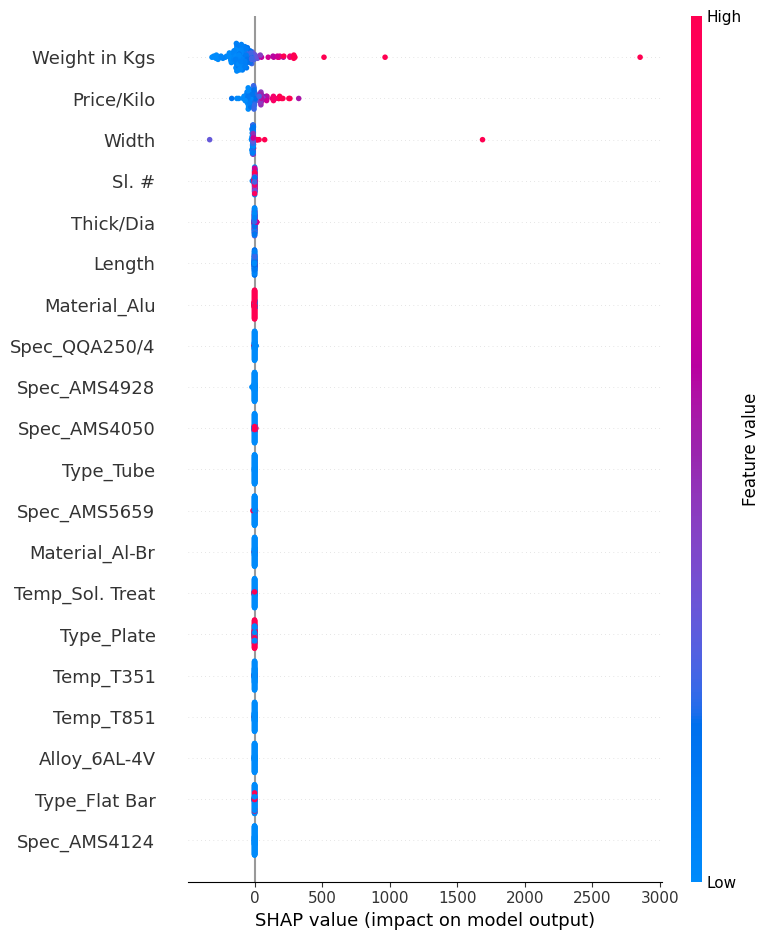

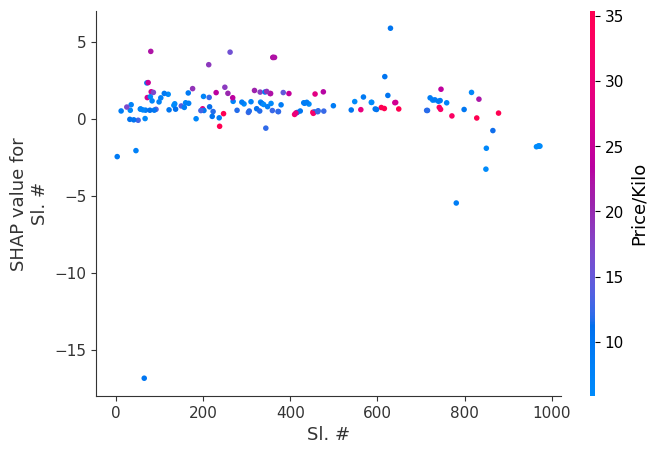

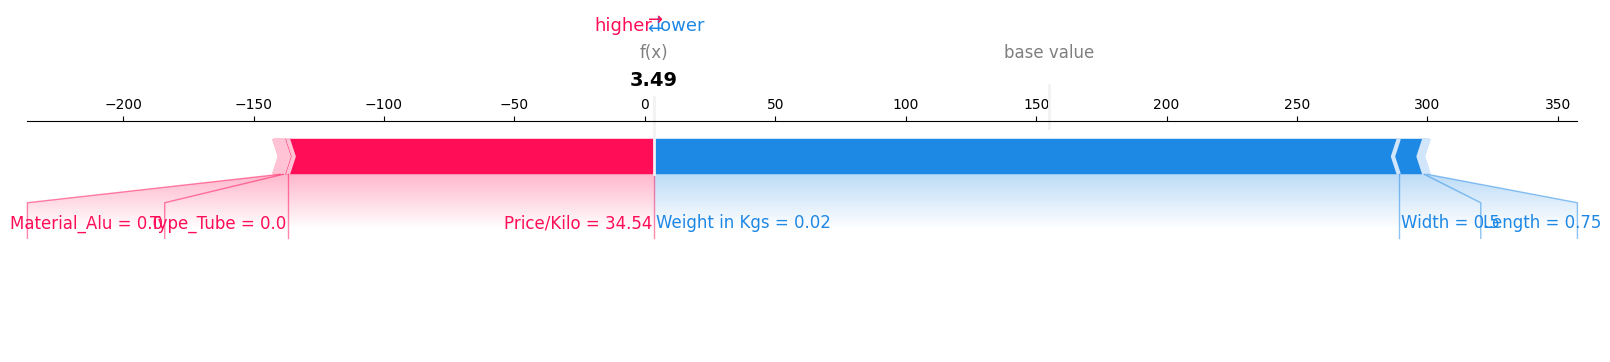

In [ ]:

# Remove dollar signs and convert RM Price to float
df['RM Price'] = df['RM Price'].replace('[\$,]', '', regex=True).astype(float)

# Clean the Price/Kilo column
df['Price/Kilo'] = df['Price/Kilo'].replace('[\$,]', '', regex=True)
df['Price/Kilo'] = pd.to_numeric(df['Price/Kilo'], errors='coerce')

# Fill missing values in Price/Kilo with NaN
df['Price/Kilo'].fillna(np.nan, inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Material', 'Type', 'Temp', 'Spec', 'Alloy'], drop_first=True)

# Features and target variable
X = df_encoded.drop('RM Price', axis=1)
y = df_encoded['RM Price']

# Handle any remaining missing values in features (e.g., drop rows with NaNs)
X = X.dropna()

# Align X and y to ensure there are no missing target values for the remaining feature rows
y = y[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
import lime
import lime.lime_tabular

# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['RM Price'],
    verbose=True,
    mode='regression'
)

# Select an instance from the test set to explain
i = 0  # You can change this index to explain different instances

# LIME for Decision Tree
dt_exp = explainer.explain_instance(X_test.values[i], regressor.predict, num_features=10)
print(f"LIME Explanation for Decision Tree Model - Instance {i}")
dt_exp.show_in_notebook(show_table=True)

# Optional: Save the explanation to an HTML file
dt_exp.save_to_file('dt_explanation.html')
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(regressor)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# SHAP dependence plot for the first feature (change the feature index as needed)
shap.dependence_plot(0, shap_values, X_test, feature_names=X_test.columns)

# Optional: SHAP force plot for the first prediction (change the index as needed)
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], matplotlib=True)


RANDOM FOREST IMPLEMENTATION

Mean Squared Error: 1769.399972091045
R^2 Score: 0.9889285885480785


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 3.0552934761579422
Prediction_local [12.17340038]
Right: 7.5933
LIME Explanation for Random Forest Model - Instance 0


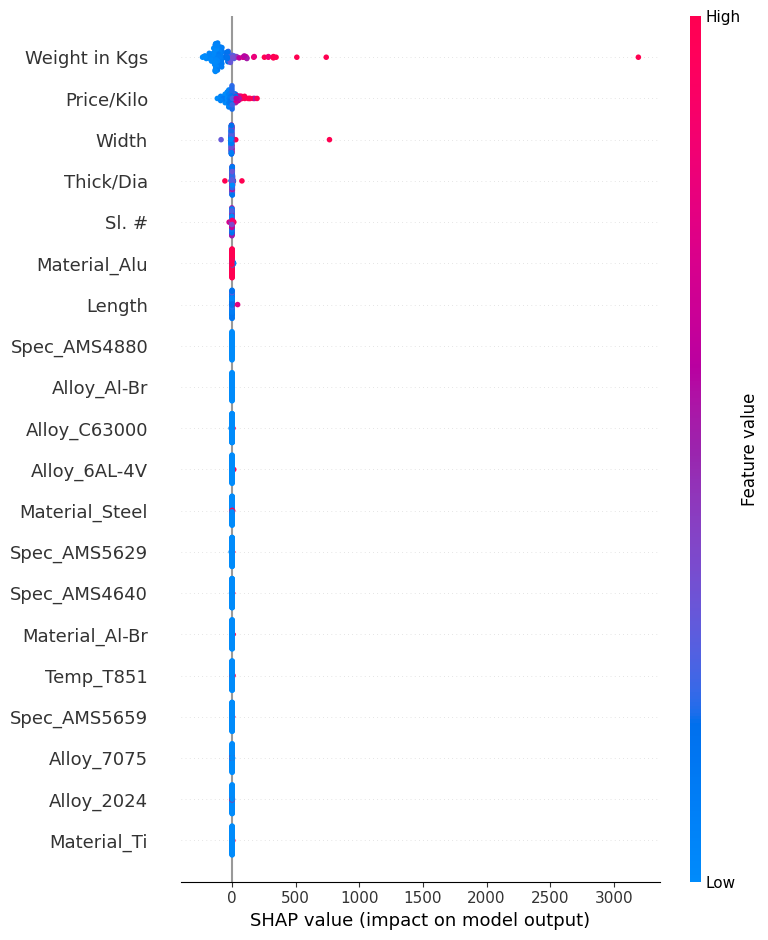

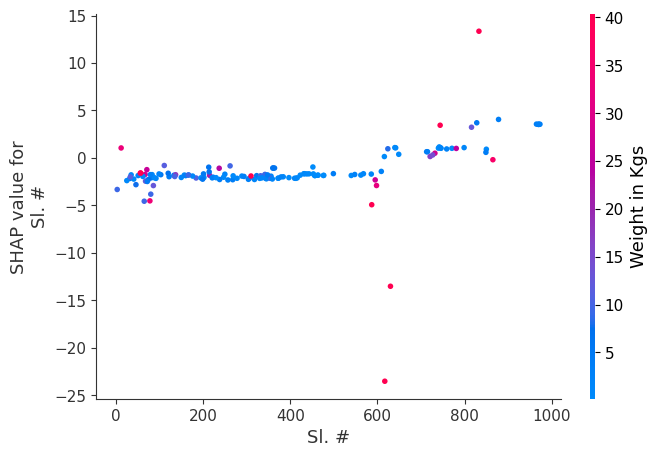

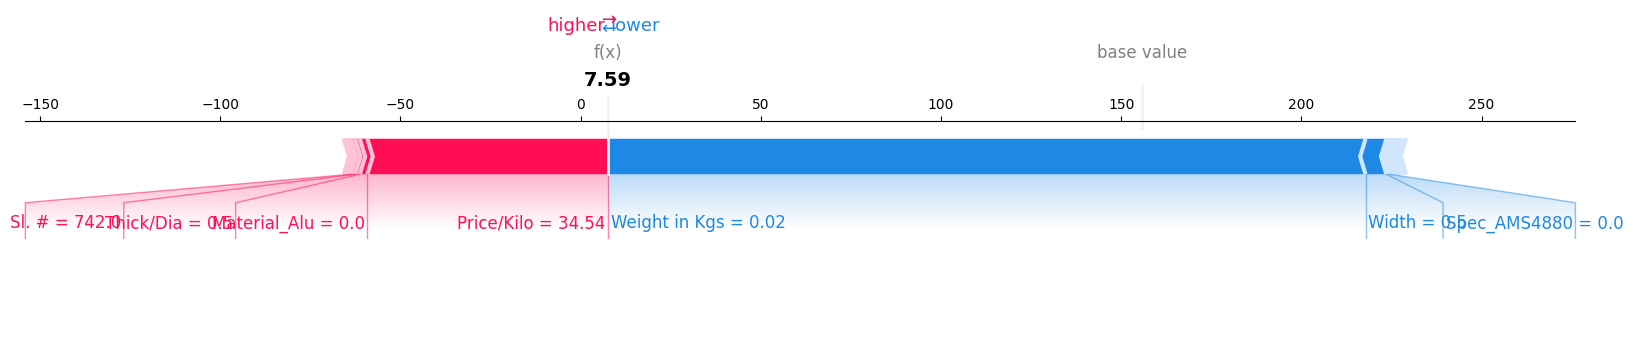

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_encoded, X, y are already prepared as per your preprocessing steps

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed

# Train the model
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
import lime
import lime.lime_tabular

# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['RM Price'],
    verbose=True,
    mode='regression'
)

# Select an instance from the test set to explain
i = 0  # You can change this index to explain different instances

# LIME for Random Forest
rf_exp = explainer.explain_instance(X_test.values[i], regressor.predict, num_features=10)
print(f"LIME Explanation for Random Forest Model - Instance {i}")
rf_exp.show_in_notebook(show_table=True)

# Optional: Save the explanation to an HTML file
rf_exp.save_to_file('rf_explanation.html')

import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(regressor)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# SHAP dependence plot for the first feature (change the feature index as needed)
shap.dependence_plot(0, shap_values, X_test, feature_names=X_test.columns)

# Optional: SHAP force plot for the first prediction (change the index as needed)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)

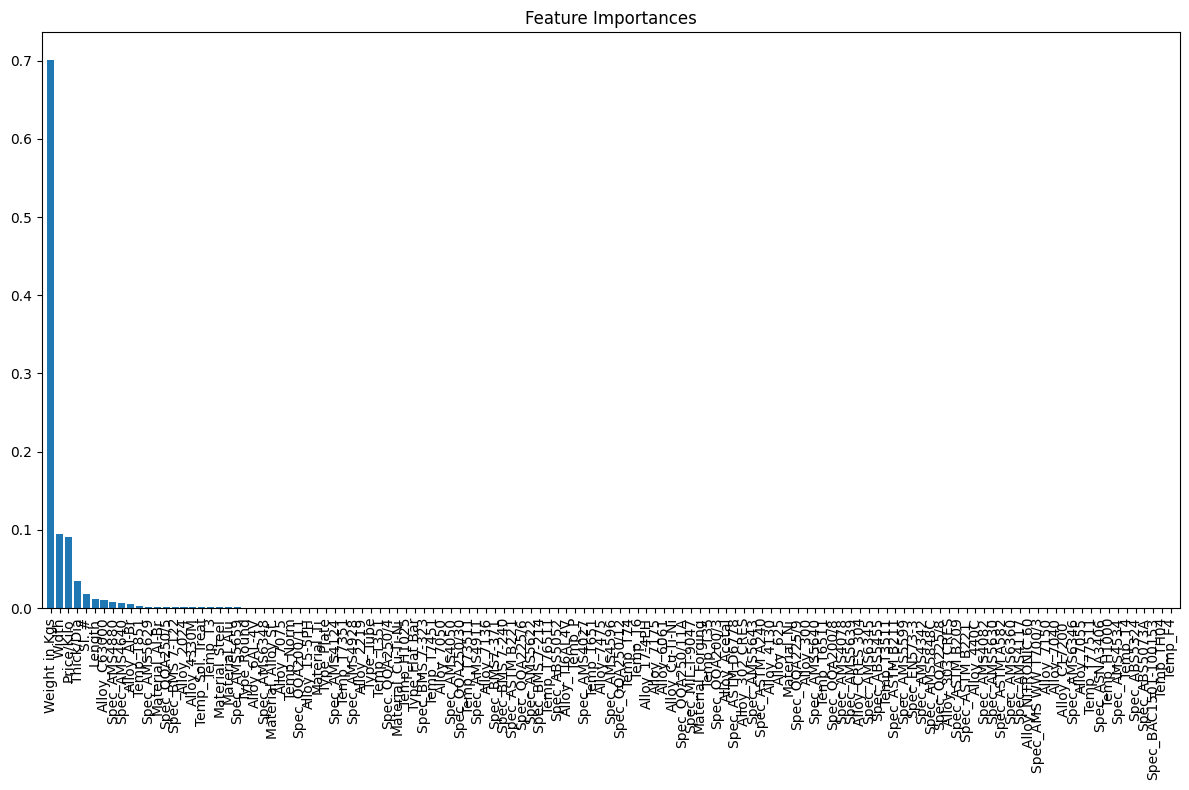

In [ ]:
# Assuming 'regressor' is your trained RandomForestRegressor
import matplotlib.pyplot as plt
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


In [ ]:
pip install lime

In [ ]:

import lime
import lime.lime_tabular

# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['RM Price'],
    verbose=True,
    mode='regression'
)

# Select an instance from the test set to explain
i = 0  # You can change this index to explain different instances

# LIME for Decision Tree
dt_exp = explainer.explain_instance(X_test.values[i], regressor.predict, num_features=10)
print(f"LIME Explanation for Decision Tree Model - Instance {i}")
dt_exp.show_in_notebook(show_table=True)

# Optional: Save the explanation to an HTML file
dt_exp.save_to_file('dt_explanation.html')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 1239.4899089377018
Prediction_local [11.42108967]
Right: 7.5933
LIME Explanation for Decision Tree Model - Instance 0
